# Chapter_4_Regression

In [2]:
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Part 1: Liner Regression

## 1. Nomal Equation

In [3]:
# Nomal Equation test
import numpy as np
x = 2*np.random.rand(100, 1)
y = 4+ 3*x + np.random.randn(100, 1)

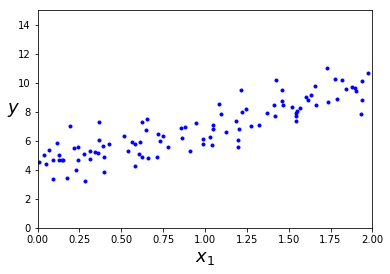

In [4]:
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

### a. Nomal Equation By Numpy

In [5]:
x_b = np.c_[np.ones((100, 1)), x] # add xo=1 to each instance
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

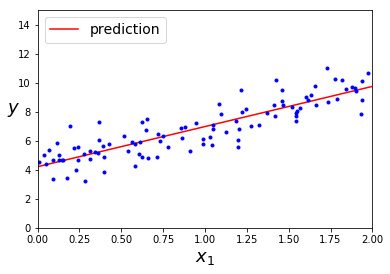

In [7]:
plt.plot(x_new, y_predict, "r-", label="prediction")
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

### b. sklearn linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(x_new)

array([[4.21509616],
       [9.75532293]])

# Part 2: Gradient Descent

### a. Batch Gradient Descent

In [13]:
eta = 0.1 
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    

In [14]:
theta

array([[4.21509616],
       [2.77011339]])

In [15]:
x_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

### b. Stochastic Gradient Descent

In [19]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(x, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=inf, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.25857953]), array([2.95762926]))

### c.Mini-batch gradient descent

# Part3: Polynomial Regression

In [21]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [22]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

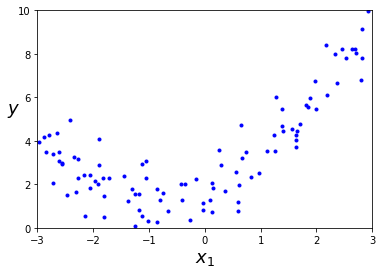

In [23]:
plt.plot(x, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x[0]

array([-0.75275929])

In [28]:
x_poly[0]

array([-0.75275929,  0.56664654])

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipelineimport Pipeline

